# 0. About

This notebook is to try to use some supervised PCA.
Currently there is no supervised PCA module in sklearn, so we need to modify the module a little.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [2]:
# load data
X, y = load_diabetes(return_X_y=True)
sample_num, feature_num = X.shape

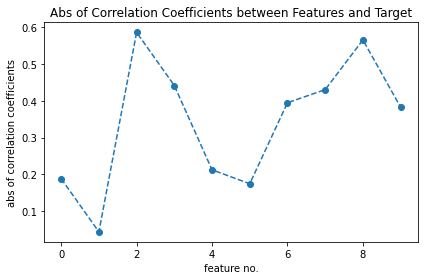

In [3]:
# check dataset correlation coefficients between features and target
corr_coef = np.corrcoef(X.T, y.T)

fig, ax = plt.subplots()

ax.plot(np.abs(corr_coef[:-1, -1]), ls='--', marker='o')
ax.set_xlabel('feature no.')
ax.set_ylabel('abs of correlation coefficients')
ax.set_title('Abs of Correlation Coefficients between Features and Target')

plt.tight_layout()

# 1. Regular PCA

First we need to make a benchmark to see how it goes with the dataset with the regular PCA.

# 2. Bair's Supervised Principal Components

The algorithm is documented in the following paper:
[Prediction by Supervised Principal Components](https://doi.org/10.1198/016214505000000628).

The idea is to compute the [**Standard Regression Coefficients**](https://en.wikipedia.org/wiki/Standardized_coefficient) between X and y first, and ignore fetures with low coefficients.

In [4]:
# compute standardized regression coefficients
beta_weights = np.zeros((feature_num, 1))
for feature_i in range(feature_num):
    beta_weights[feature_i, 0] = X[:, feature_i].dot(y.flatten())/np.linalg.norm(X[:, feature_i])

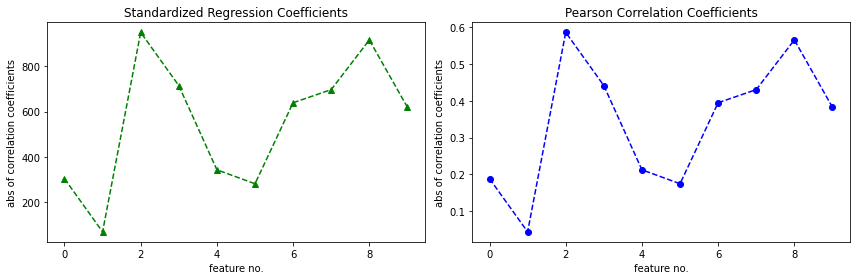

In [5]:
# visualize the coefficients
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Standardized Regression Coefficients
axes[0].plot(np.abs(beta_weights), marker='^', ls='--', color='green')
axes[0].set_xlabel('feature no.')
axes[0].set_ylabel('abs of correlation coefficients')
axes[0].set_title('Standardized Regression Coefficients')

# Pearson Correlation Coefficients
axes[1].plot(np.abs(corr_coef[:-1, -1]), ls='--', marker='o', color='blue')
axes[1].set_xlabel('feature no.')
axes[1].set_ylabel('abs of correlation coefficients')
axes[1].set_title('Pearson Correlation Coefficients')

plt.tight_layout()